In [1]:
import pandas as pd
data = [1,2,3,4]
series1 = pd.Series(data)
series1

0    1
1    2
2    3
3    4
dtype: int64

In [2]:
type(series1)

pandas.core.series.Series

In [3]:
series1 = pd.Series(data, index=['a','b','c','d'])
series1

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,3
3,4


In [5]:
dict = {'fruits':['Mangoes', 'Banana', 'Apples', 'Gauva'], 
       'Count': [10,15,5,20]}

In [6]:
df = pd.DataFrame(dict)
df

,fruits,Count
0,Mangoes,10
1,Banana,15
2,Apples,5
3,Gauva,20


In [7]:
Ser = pd.Series(dict)
Ser

fruits    [Mangoes, Banana, Apples, Gauva]
Count                      [10, 15, 5, 20]
dtype: object

In [8]:
df1 = pd.DataFrame(Ser)
df1

,0
fruits,"[Mangoes, Banana, Apples, Gauva]"
Count,"[10, 15, 5, 20]"


In [9]:
import numpy as np

In [10]:
arr = np.array([[5000,6000],['shiva', 'Krishna']])

In [11]:
arr

array([['5000', '6000'],
       ['shiva', 'Krishna']], dtype='<U11')

In [12]:
arr[1]

array(['shiva', 'Krishna'], dtype='<U11')

In [13]:
arr[0]

array(['5000', '6000'], dtype='<U11')

In [14]:
arr[1:,1]

array(['Krishna'], dtype='<U11')

In [15]:
pd.DataFrame({'name':arr[1], 'score':arr[0]})

,name,score
0,shiva,5000
1,Krishna,6000


In [16]:
player = ['P1', 'P2', 'P3']
points = [8,10,15]
title = ['G1', 'G2', 'G3']
df1 = pd.DataFrame({'players':player, 'Points':points, 'Title':title})
df1

,players,Points,Title
0,P1,8,G1
1,P2,10,G2
2,P3,15,G3


In [17]:
player = ['P1','P5','P6']
power = ['punch', 'Kick', 'elbow']
title = ['G1','G5','G6']
df2 = pd.DataFrame({'players':player, 'Power':power, 'Title': title})
df2

,players,Power,Title
0,P1,punch,G1
1,P5,Kick,G5
2,P6,elbow,G6


In [18]:
#inner merge
df1.merge(df2, on='Title', how='inner')

,players_x,Points,Title,players_y,Power
0,P1,8,G1,P1,punch


In [19]:
df1.merge(df2)

,players,Points,Title,Power
0,P1,8,G1,punch


In [20]:
df1.merge(df2, on='players', how='left')

,players,Points,Title_x,Power,Title_y
0,P1,8,G1,punch,G1
1,P2,10,G2,NaN,NaN
2,P3,15,G3,NaN,NaN


In [21]:
df1.merge(df2, on='players', how='right')

,players,Points,Title_x,Power,Title_y
0,P1,8.0,G1,punch,G1
1,P5,NaN,NaN,Kick,G5
2,P6,NaN,NaN,elbow,G6


In [22]:
df1.merge(df2, on='players', how='outer')

,players,Points,Title_x,Power,Title_y
0,P1,8.0,G1,punch,G1
1,P2,10.0,G2,NaN,NaN
2,P3,15.0,G3,NaN,NaN
3,P5,NaN,NaN,Kick,G5
4,P6,NaN,NaN,elbow,G6


In [23]:
#diff b/w Merge and joins
#Merge: the two dataframes will merge based on common attributes/column name
#join: the two dataframes will join based on index values
#so join is used when we want perform on two different datsets

In [24]:
player = ['P1','P5','P6']
power = ['punch', 'Kick', 'elbow']
title = ['G1','G5','G6']
df3 = pd.DataFrame({'players':player, 'Power':power, 'Title': title}, index=['L1','L2','L3'])
df3

,players,Power,Title
L1,P1,punch,G1
L2,P5,Kick,G5
L3,P6,elbow,G6


In [25]:
player = ['P1','P5','P6']
power = ['punch', 'Kick', 'elbow']
title = ['G1','G5','G6']
df4 = pd.DataFrame({'players1':player, 'Power1':power, 'Title1': title}, index=['L2','L4','L3'])
df4

,players1,Power1,Title1
L2,P1,punch,G1
L4,P5,Kick,G5
L3,P6,elbow,G6


In [26]:
#inner join
df3.join(df4, how='inner')

,players,Power,Title,players1,Power1,Title1
L2,P5,Kick,G5,P1,punch,G1
L3,P6,elbow,G6,P6,elbow,G6


In [27]:
#left join
df3.join(df4, how='left')

,players,Power,Title,players1,Power1,Title1
L1,P1,punch,G1,NaN,NaN,NaN
L2,P5,Kick,G5,P1,punch,G1
L3,P6,elbow,G6,P6,elbow,G6


In [28]:
#right join
df3.join(df4, how='right')

,players,Power,Title,players1,Power1,Title1
L2,P5,Kick,G5,P1,punch,G1
L4,NaN,NaN,NaN,P5,Kick,G5
L3,P6,elbow,G6,P6,elbow,G6


In [29]:
#outer join
df3.join(df4, how='outer')

,players,Power,Title,players1,Power1,Title1
L1,P1,punch,G1,NaN,NaN,NaN
L2,P5,Kick,G5,P1,punch,G1
L3,P6,elbow,G6,P6,elbow,G6
L4,NaN,NaN,NaN,P5,Kick,G5


In [30]:
pd.concat([df1,df3,df4])

,players,Points,Title,Power,players1,Power1,Title1
0,P1,8.0,G1,NaN,NaN,NaN,NaN
1,P2,10.0,G2,NaN,NaN,NaN,NaN
2,P3,15.0,G3,NaN,NaN,NaN,NaN
L1,P1,NaN,G1,punch,NaN,NaN,NaN
L2,P5,NaN,G5,Kick,NaN,NaN,NaN
L3,P6,NaN,G6,elbow,NaN,NaN,NaN
L2,NaN,NaN,NaN,NaN,P1,punch,G1
L4,NaN,NaN,NaN,NaN,P5,Kick,G5
L3,NaN,NaN,NaN,NaN,P6,elbow,G6


In [31]:
df = pd.read_csv("E:\Intellipaat Class\PANDAS\QUIZ\cars-5\cars.csv")

In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
df.head()

,S.No,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [34]:
df.tail()

,S.No,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,28,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,29,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,30,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,31,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,32,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [35]:
df.head(10)

,S.No,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,6,Valiant,18.1,6,225.0,105,2.76,3.460,NaN,1,0,3,1
6,7,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,8,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,9,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,10,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [36]:
df.shape

(32, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    32 non-null     int64  
 1   model   32 non-null     object 
 2   mpg     32 non-null     float64
 3   cyl     32 non-null     int64  
 4   disp    32 non-null     float64
 5   hp      32 non-null     int64  
 6   drat    32 non-null     float64
 7   wt      32 non-null     float64
 8   qsec    29 non-null     float64
 9   vs      32 non-null     int64  
 10  am      32 non-null     int64  
 11  gear    32 non-null     int64  
 12  carb    32 non-null     int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 3.4+ KB


In [38]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   S.No    int64  
 1   model   object 
 2   mpg     float64
 3   cyl     int64  
 4   disp    float64
 5   hp      int64  
 6   drat    float64
 7   wt      float64
 8   qsec    float64
 9   vs      int64  
 10  am      int64  
 11  gear    int64  
 12  carb    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 3.4+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_892\797607940.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=False)


In [39]:
df.mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_892\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


S.No     16.500000
mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.674828
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [40]:
df.median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_892\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


S.No     16.500
mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.420
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [41]:
df.std()

C:\Users\DELL\AppData\Local\Temp\ipykernel_892\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


S.No      9.380832
mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.780394
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [42]:
df.max()

S.No             32
model    Volvo 142E
mpg            33.9
cyl               8
disp          472.0
hp              335
drat           4.93
wt            5.424
qsec           22.9
vs                1
am                1
gear              5
carb              8
dtype: object

In [43]:
df.min()

S.No               1
model    AMC Javelin
mpg             10.4
cyl                4
disp            71.1
hp                52
drat            2.76
wt             1.513
qsec            14.5
vs                 0
am                 0
gear               3
carb               1
dtype: object

In [44]:
df.count() #count on non null values

S.No     32
model    32
mpg      32
cyl      32
disp     32
hp       32
drat     32
wt       32
qsec     29
vs       32
am       32
gear     32
carb     32
dtype: int64

In [45]:
df.describe()

,S.No,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,29.000000,32.000000,32.000000,32.000000,32.0000
mean,16.500000,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.674828,0.437500,0.406250,3.687500,2.8125
std,9.380832,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.780394,0.504016,0.498991,0.737804,1.6152
min,1.000000,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,8.750000,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.870000,0.000000,0.000000,3.000000,2.0000
50%,16.500000,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.420000,0.000000,0.000000,4.000000,2.0000
75%,24.250000,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.600000,1.000000,1.000000,4.000000,4.0000
max,32.000000,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [46]:
df.columns

Index(['S.No', 'model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [47]:
#rename
df = df.rename(columns={'model':'Models'})
df.head()

,S.No,Models,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [48]:
df.qsec = df['qsec'].fillna(df['qsec'].mean())

In [49]:
df.qsec

0     16.460000
1     17.020000
2     18.610000
3     19.440000
4     17.020000
5     17.674828
6     15.840000
7     20.000000
8     22.900000
9     18.300000
10    18.900000
11    17.400000
12    17.600000
13    18.000000
14    17.980000
15    17.820000
16    17.420000
17    17.674828
18    18.520000
19    19.900000
20    20.010000
21    16.870000
22    17.300000
23    15.410000
24    17.050000
25    17.674828
26    16.700000
27    16.900000
28    14.500000
29    15.500000
30    14.600000
31    18.600000
Name: qsec, dtype: float64

In [50]:
df['qsec'].isna().sum()

0

In [51]:
df = df.drop(['S.No'], axis=1)

In [52]:
#or
#df = df.drop(columns=['S.no'])

In [53]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.360351,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.548775,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.385207,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.650674,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.120175,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.130362,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.360351,-0.548775,-0.385207,-0.650674,0.120175,-0.130362,1.000000,0.667873,-0.271763,-0.203784,-0.573987
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.667873,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.271763,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.203784,0.206023,0.794059,1.000000,0.274073


In [54]:
df = df.rename(columns={'cyl':'Cyl'})
df.head()

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [55]:
#changing datatype
df.mpg = df.mpg.astype(float)

In [56]:
df.mpg.dtype

dtype('float64')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Models  32 non-null     object 
 1   mpg     32 non-null     float64
 2   Cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


#Manuplating the data

In [58]:
df.iloc[:,4] #view hp column only

0     110
1     110
2      93
3     110
4     175
5     105
6     245
7      62
8      95
9     123
10    123
11    180
12    180
13    180
14    205
15    215
16    230
17     66
18     52
19     65
20     97
21    150
22    150
23    245
24    175
25     66
26     91
27    113
28    264
29    175
30    335
31    109
Name: hp, dtype: int64

In [59]:
df.iloc[:4,4]

0    110
1    110
2     93
3    110
Name: hp, dtype: int64

In [60]:
df.iloc[:,:] #all rows & all columns

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.460000,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.020000,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.610000,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.440000,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.020000,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,17.674828,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.840000,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.000000,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.900000,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.300000,1,0,4,4


In [61]:
# for attributes from hp to carb sell all the records from index 6
df.iloc[6:,4:]

,hp,drat,wt,qsec,vs,am,gear,carb
6,245,3.21,3.570,15.840000,0,0,3,4
7,62,3.69,3.190,20.000000,1,0,4,2
8,95,3.92,3.150,22.900000,1,0,4,2
9,123,3.92,3.440,18.300000,1,0,4,4
10,123,3.92,3.440,18.900000,1,0,4,4
11,180,3.07,4.070,17.400000,0,0,3,3
12,180,3.07,3.730,17.600000,0,0,3,3
13,180,3.07,3.780,18.000000,0,0,3,3
14,205,2.93,5.250,17.980000,0,0,3,4
15,215,3.00,5.424,17.820000,0,0,3,4


In [62]:
#view all the rows from first column
df.iloc[:,0]

0               Mazda RX4
1           Mazda RX4 Wag
2              Datsun 710
3          Hornet 4 Drive
4       Hornet Sportabout
5                 Valiant
6              Duster 360
7               Merc 240D
8                Merc 230
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
17               Fiat 128
18            Honda Civic
19         Toyota Corolla
20          Toyota Corona
21       Dodge Challenger
22            AMC Javelin
23             Camaro Z28
24       Pontiac Firebird
25              Fiat X1-9
26          Porsche 914-2
27           Lotus Europa
28         Ford Pantera L
29           Ferrari Dino
30          Maserati Bora
31             Volvo 142E
Name: Models, dtype: object

In [63]:
#all the record of mpg
df.loc[:,'mpg']

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [64]:
df.loc[:6,'mpg']

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
5    18.1
6    14.3
Name: mpg, dtype: float64

In [65]:
#view first 7 recors from mpg to qsec
df.loc[:6,'mpg':'qsec']

,mpg,Cyl,disp,hp,drat,wt,qsec
0,21.0,6,160.0,110,3.90,2.620,16.460000
1,21.0,6,160.0,110,3.90,2.875,17.020000
2,22.8,4,108.0,93,3.85,2.320,18.610000
3,21.4,6,258.0,110,3.08,3.215,19.440000
4,18.7,8,360.0,175,3.15,3.440,17.020000
5,18.1,6,225.0,105,2.76,3.460,17.674828
6,14.3,8,360.0,245,3.21,3.570,15.840000


In [66]:
#setting value 1 to column am
df.am = 1
df.head()

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,1,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,1,3,2


In [67]:
#applying functions
f = lambda x : x*2
df.am = df.am.apply(f)
df

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.460000,0,2,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.020000,0,2,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.610000,1,2,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.440000,1,2,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.020000,0,2,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,17.674828,1,2,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.840000,0,2,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.000000,1,2,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.900000,1,2,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.300000,1,2,4,4


In [68]:
#sorting based on particular column
df.sort_values(by='Cyl')

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.600000,1,2,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.610000,1,2,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.900000,1,2,5,2
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.700000,0,2,5,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,17.674828,1,2,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.010000,1,2,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.000000,1,2,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.900000,1,2,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.900000,1,2,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.520000,1,2,4,2


In [69]:
df.sort_values(by='Cyl', ascending=False)

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.420000,0,2,3,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.600000,0,2,5,8
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.020000,0,2,3,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.500000,0,2,5,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.840000,0,2,3,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.050000,0,2,3,2
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.410000,0,2,3,4
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.300000,0,2,3,2
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.870000,0,2,3,2
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.400000,0,2,3,3


In [70]:
#filtering records which have values more than 6 cylinders
(df.Cyl>6).sum()

14

In [71]:
#to view the data
data1 =df['Cyl']>6
df[data1]

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,2,3,2
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,2,3,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,2,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,2,3,3
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,2,3,3
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,2,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,2,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,2,3,4
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,2,3,2
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,2,3,2


In [72]:
df[df.Cyl>6]

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,2,3,2
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,2,3,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,2,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,2,3,3
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,2,3,3
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,2,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,2,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,2,3,4
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,2,3,2
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,2,3,2


In [73]:
#.>6 cyl  and hp>300
df[(df.Cyl>6) & (df.hp>300)]

,Models,mpg,Cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,2,5,8


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

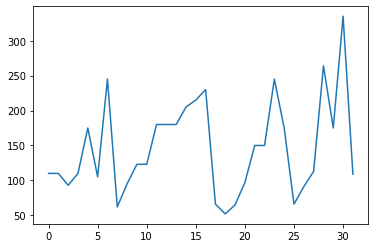

In [80]:
y1 = df.hp
x = range(32)
plt.plot(x,y)

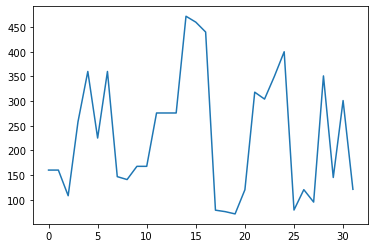

In [81]:
y2 = df.disp
plt.plot(x,y2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


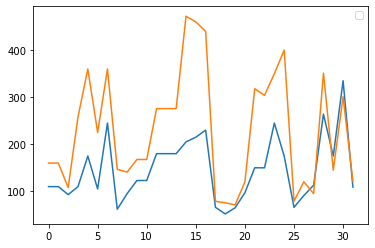

In [83]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend()

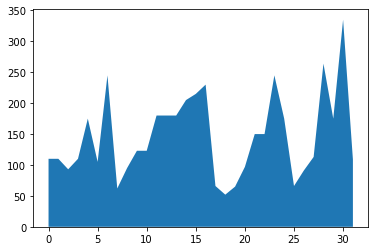

In [84]:
plt.stackplot(x,y1)

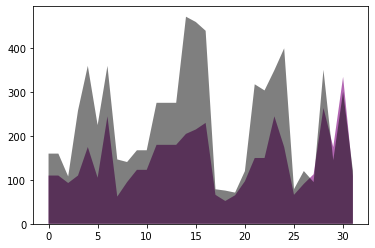

In [88]:
plt.stackplot(x,y1, colors='purple', alpha=0.6)
plt.stackplot(x,y2, colors='black', alpha=0.5)

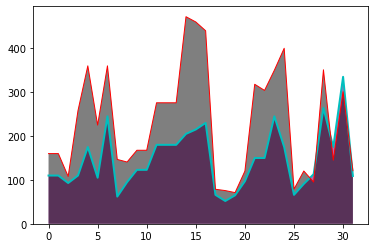

In [89]:
plt.plot(x,y1, color='c', linewidth=2)
plt.stackplot(x,y1, colors='purple', alpha=0.6)
plt.plot(x,y2, color='r', linewidth=1)
plt.stackplot(x,y2, colors='black', alpha=0.5)

<BarContainer object of 32 artists>

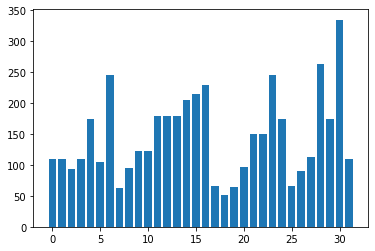

In [90]:
plt.bar(x,y1)

<BarContainer object of 32 artists>

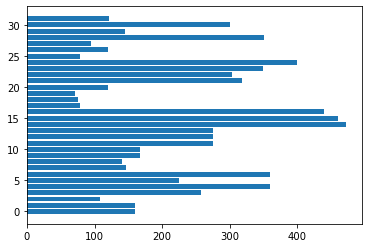

In [91]:
plt.barh(x,y2)